Sankt-Peyersburg is a buautiful Russian city. It is called the Cultural Capital of Russia. We are going to do an analysis of city memorials which can be usef for planning the city budget for renovation of touristc areas. We take memorials data kindly provided by city administration

In [12]:
import pandas
import seaborn

data = pandas.read_csv('spb_memo.csv')

print(len(data))

9275


wow, there are 9 275 memorial ovjects in Sankt-Petersburg. Which districts are they in?

<AxesSubplot:>

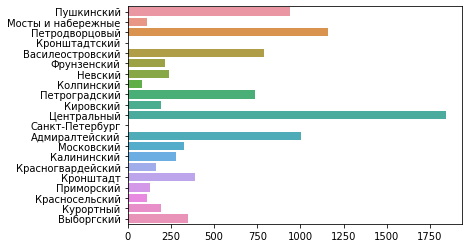

In [13]:
districts = list(data['district'])
districts_unique = list(set(districts))
total_per_district = []

for district in set(districts):
    district_counter = 0
    for index in range(len(districts)):
        if districts[index] == district:
            district_counter += 1
    total_per_district.append(district_counter)

seaborn.barplot(x=total_per_district, y=districts_unique)

Ok, that's expected, the most points of our interest are located in Central district as well as In Peters's The Great Castl and Admirals district



<AxesSubplot:>

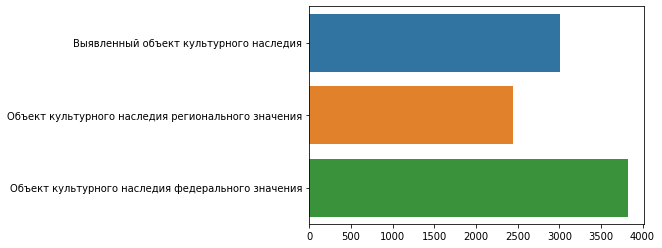

In [15]:
protection_categories = list(data['protection_category'])
protection_categories_unique = list(set(protection_categories))
total_per_category = []

for category in set(protection_categories):
    category_counter = 0
    for index in range(len(districts)):
        if protection_categories[index] == category:
            category_counter += 1
    total_per_category.append(category_counter)
    
seaborn.barplot(x=total_per_category, y=protection_categories_unique)

2011


<AxesSubplot:xlabel='count', ylabel='name'>

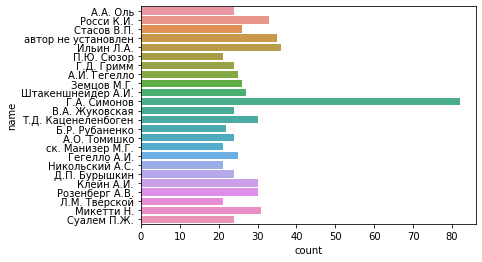

In [16]:
authors_all = list(data['author'])
authors = []
total_per_author = []
    
for author_line in authors_all:
    if author_line == author_line:
        if ',' in author_line:
            for author in author_line.replace(';', ',').replace('арх. ', '').replace('худ. ', '').replace('гражд.инж. ', '').replace('архитекторы ', '').replace('фонтанный мастер ', '').replace('арх-ры ', '').split(','):
                author = author.strip()
                if author not in authors:
                    authors.append(author.strip())
                    total_per_author.append(1)
                else:
                    index = authors.index(author.strip())
                    total_per_author[index] += 1
        else:
            if author not in authors:
                authors.append(author.strip())
                
authors_df = pandas.DataFrame(authors, columns=['name'])
authors_df['count'] = total_per_author

most_frequent_authors_df = authors_df.loc[(authors_df['count'] > 20)]
    
print (len(authors))
#print(most_frequent_authors_df)

seaborn.barplot(x=most_frequent_authors_df['count'], y=most_frequent_authors_df['name'])

<AxesSubplot:ylabel='district'>

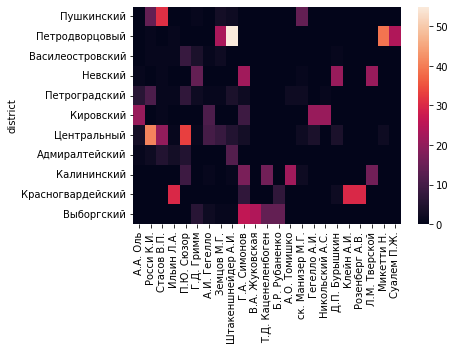

In [31]:
districts_authors_df = pandas.DataFrame(districts_unique, columns=['district'])
lat = []
lon = []

for col in most_frequent_authors_df['name']:
    districts_authors_df[col] = 0
    
districts_authors_df.set_index('district', inplace=True)

top_poi = []

for district in districts_unique:
    district_df = data.loc[(data['district'] == district) & ('19' not in data['date'])]
    for index, row in district_df.iterrows():
        for author in most_frequent_authors_df['name']:
            if row['author'] == row['author'] and author in row['author']:
                districts_authors_df[author][district] += 1
                top_poi.append(row['number'])

districts_authors_df.drop('автор не установлен', axis=1, inplace=True)
districts_authors_df = districts_authors_df.loc[(districts_authors_df>5).any(axis=1)] #!=0

#print(top_poi)

seaborn.heatmap(districts_authors_df, xticklabels=True, yticklabels=True) #, annot=True

In [80]:
df = pandas.read_csv('spb_memo.csv')
df['lat'] = float('nan')
df['lon'] = float('nan')
df.to_csv("spb_memo_geo.csv", index=False)

In [92]:
from decimal import Decimal
import os
from dotenv import load_dotenv
from yandex_geocoder import Client

load_dotenv('.env')
yandex_geo_api_key = os.environ.get("yaGeoApi")
client = Client(yandex_geo_api_key)

df = pandas.read_csv('spb_memo_geo.csv')

coordinates = 0
api_limit_per_day = 900

for poi in top_poi:
    if api_limit_per_day > 0:
        poi_row = df.loc[(df['number'] == poi)]
        if poi_row.empty:
            lat = float('nan')
        else:
            lat = list(poi_row['lat'])[0]
        addr = list(poi_row['address'])
        if lat != lat and len(addr) > 0:
            coords = client.coordinates("Санкт-Петербург, " + addr[0])
            df.loc[poi_row.index, 'lon'], df.loc[poi_row.index, 'lat'] = coords
            api_limit_per_day -= 1
            df.to_csv("spb_memo_geo.csv", index=False)


<AxesSubplot:>

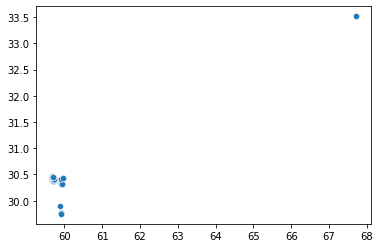

In [100]:
x = list(df.loc[(df['lat'] > 0)]['lat'])
y = list(df.loc[(df['lon'] > 0)]['lon'])

seaborn.scatterplot(x=x, y=y)

In [93]:
import osmnx as ox

place = ["Berlin, Germany"]
G = ox.graph_from_place(place, retain_all=True, simplify = True, network_type='all')

ModuleNotFoundError: No module named 'osmnx'